In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Final Data\ChickPea\ChickPea_Karnataka_updated.csv")
df = df.drop(columns=['latitude','longitude','DistrictName', 'year'])
# df = df.sample(frac=1).reset_index(drop=True)
#df = df.drop(columns=['DistrictName','latitude','longitude','year','year_mask'])

In [3]:
df = df.rename(columns={'Yield(tonnes/hectare)':'Yield(Tonnes/Hectare)'},inplace=False)

In [4]:
df.columns

Index(['stl1_11', 'stl1_12', 'stl1_1', 'stl1_2', 'stl1_3', 'stl1_4', 'stl2_11',
       'stl2_12', 'stl2_1', 'stl2_2', 'stl2_3', 'stl2_4', 'stl3_11', 'stl3_12',
       'stl3_1', 'stl3_2', 'stl3_3', 'stl3_4', 'stl4_11', 'stl4_12', 'stl4_1',
       'stl4_2', 'stl4_3', 'stl4_4', 'swvl1_11', 'swvl1_12', 'swvl1_1',
       'swvl1_2', 'swvl1_3', 'swvl1_4', 'swvl2_11', 'swvl2_12', 'swvl2_1',
       'swvl2_2', 'swvl2_3', 'swvl2_4', 'swvl3_11', 'swvl3_12', 'swvl3_1',
       'swvl3_2', 'swvl3_3', 'swvl3_4', 'swvl4_11', 'swvl4_12', 'swvl4_1',
       'swvl4_2', 'swvl4_3', 'swvl4_4', 'ssr_12', 'ssr_11', 'ssr_1', 'ssr_2',
       'ssr_3', 'ssr_4', 'u10_11', 'u10_12', 'u10_1', 'u10_2', 'u10_3',
       'u10_4', 'v10_11', 'v10_12', 'v10_1', 'v10_2', 'v10_3', 'v10_4',
       'tmax_11', 'tmax_12', 'tmax_1', 'tmax_2', 'tmax_3', 'tmax_4', 'tmin_11',
       'tmin_12', 'tmin_1', 'tmin_2', 'tmin_3', 'tmin_4', 'rain_11', 'rain_12',
       'rain_1', 'rain_2', 'rain_3', 'rain_4', 'countrain_11', 'countrain_12',
   

In [5]:
# df['stl1'] = (df['stl1_1'] + df['stl1_2'])/2
# df['stl2'] = (df['stl2_1'] + df['stl2_2'])/2
# df['stl3'] = (df['stl3_1'] + df['stl3_2'])/2
# df['stl4'] = (df['stl4_1'] + df['stl4_2'])/2
# df['swvl1'] = (df['swvl1_1'] + df['swvl1_2'])/2
# df['swvl2'] = (df['swvl2_1'] + df['swvl2_2'])/2
# df['swvl3'] = (df['swvl3_1'] + df['swvl3_2'])/2
# df['swvl4'] = (df['swvl4_1'] + df['swvl4_2'])/2
# df['ssr'] = (df['ssr_1'] + df['ssr_2'])/2
# df['rain'] = (df['rain_1'] + df['rain_2'])/2
# df['tmax'] = (df['tmax_1'] + df['tmax_2'])/2
# df['tmin'] = (df['tmin_1'] + df['tmin_2'])/2
# df['countrain'] = df['countrain_1'] + df['countrain_2']
# df['u10'] = (df['u10_3']+df['u10_4'])/2
# df['v10'] = (df['v10_3']+df['v10_4'])/2
# df['rh'] = (df['rh_3']+df['rh_4'])/2

In [6]:
# df = df.drop(columns=['stl1_1','stl1_2','stl2_1','stl2_2','stl3_1','stl3_2','stl4_1','stl4_2','swvl1_1','swvl1_2','swvl2_1','swvl2_2','swvl3_1','swvl3_2','swvl4_1','swvl4_2','ssr_1','ssr_2','rain_1','rain_2','tmax_1','tmax_2','tmin_1','tmin_2','countrain_1','countrain_2','u10_3','u10_4','v10_3','v10_4','rh_3','rh_4'],axis=1)

In [7]:
df.shape

(750, 97)

In [8]:
df.columns

Index(['stl1_11', 'stl1_12', 'stl1_1', 'stl1_2', 'stl1_3', 'stl1_4', 'stl2_11',
       'stl2_12', 'stl2_1', 'stl2_2', 'stl2_3', 'stl2_4', 'stl3_11', 'stl3_12',
       'stl3_1', 'stl3_2', 'stl3_3', 'stl3_4', 'stl4_11', 'stl4_12', 'stl4_1',
       'stl4_2', 'stl4_3', 'stl4_4', 'swvl1_11', 'swvl1_12', 'swvl1_1',
       'swvl1_2', 'swvl1_3', 'swvl1_4', 'swvl2_11', 'swvl2_12', 'swvl2_1',
       'swvl2_2', 'swvl2_3', 'swvl2_4', 'swvl3_11', 'swvl3_12', 'swvl3_1',
       'swvl3_2', 'swvl3_3', 'swvl3_4', 'swvl4_11', 'swvl4_12', 'swvl4_1',
       'swvl4_2', 'swvl4_3', 'swvl4_4', 'ssr_12', 'ssr_11', 'ssr_1', 'ssr_2',
       'ssr_3', 'ssr_4', 'u10_11', 'u10_12', 'u10_1', 'u10_2', 'u10_3',
       'u10_4', 'v10_11', 'v10_12', 'v10_1', 'v10_2', 'v10_3', 'v10_4',
       'tmax_11', 'tmax_12', 'tmax_1', 'tmax_2', 'tmax_3', 'tmax_4', 'tmin_11',
       'tmin_12', 'tmin_1', 'tmin_2', 'tmin_3', 'tmin_4', 'rain_11', 'rain_12',
       'rain_1', 'rain_2', 'rain_3', 'rain_4', 'countrain_11', 'countrain_12',
   

In [9]:
df = df.dropna(subset=['Yield(Tonnes/Hectare)'])

In [10]:
df.shape

(522, 97)

In [11]:
df['Yield(Tonnes/Hectare)'].skew()

0.16295636769124797

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_16308\994257175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'],color='green')


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

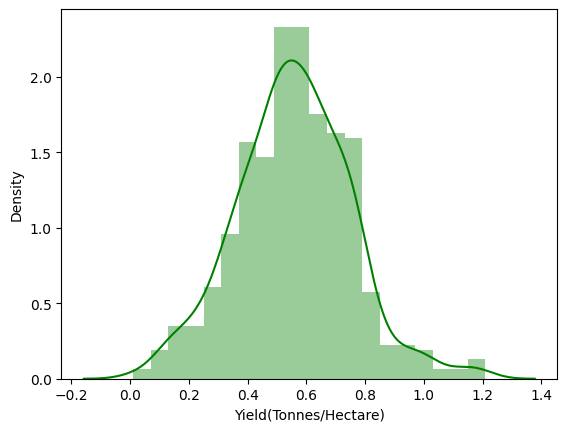

In [12]:
sns.distplot(df['Yield(Tonnes/Hectare)'],color='green')

In [13]:
df['Yield(Tonnes/Hectare)']

1      0.27
2      0.53
3      0.65
4      0.59
5      0.51
       ... 
743    0.25
744    0.83
745    0.88
746    0.39
747    0.74
Name: Yield(Tonnes/Hectare), Length: 522, dtype: float64

In [14]:
Q1 = df['Yield(Tonnes/Hectare)'].quantile(0.25)
Q3 = df['Yield(Tonnes/Hectare)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Yield_no_outliers'] = np.where((df['Yield(Tonnes/Hectare)'] < lower_bound) | (df['Yield(Tonnes/Hectare)'] > upper_bound), np.nan, df['Yield(Tonnes/Hectare)'])

num_points_after_handling_outliers = df['Yield_no_outliers'].count()
print("Number of points in the final DataFrame after handling outliers:", num_points_after_handling_outliers)

Number of points in the final DataFrame after handling outliers: 513


In [15]:
df = df.dropna(subset=['Yield_no_outliers'])
df = df.drop(columns=['Yield(Tonnes/Hectare)'])

In [16]:
df.rename(columns={'Yield_no_outliers': 'Yield(Tonnes/Hectare)'}, inplace=True)

In [17]:
df['Yield(Tonnes/Hectare)'].skew()

-0.08003525187236221

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_16308\1820324139.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'])


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

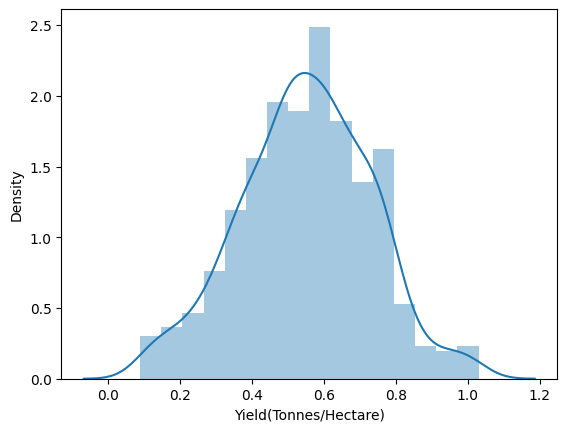

In [18]:
sns.distplot(df['Yield(Tonnes/Hectare)'])

In [19]:
df.head(10)

,stl1_11,stl1_12,stl1_1,stl1_2,stl1_3,stl1_4,stl2_11,stl2_12,stl2_1,stl2_2,...,countrain_2,countrain_3,countrain_4,rh_11,rh_12,rh_1,rh_2,rh_3,rh_4,Yield(Tonnes/Hectare)
1,22.547677,21.544899,21.985256,24.535005,28.163719,28.440576,22.714598,21.787069,21.977031,24.226889,...,0,0,8,80.486025,76.092533,60.303232,51.211272,42.174187,56.868856,0.27
2,21.862277,21.247081,22.817111,24.798288,27.230932,28.329787,22.079082,21.471184,22.669348,24.544743,...,3,0,7,74.585048,73.437915,60.320491,63.289463,46.157992,64.221821,0.53
3,23.142767,21.051725,23.756966,26.862074,28.462806,27.484458,23.279228,21.266693,23.517746,26.278416,...,0,0,7,69.122265,63.514035,56.179486,45.162146,49.570839,64.775472,0.65
4,22.793699,21.453949,23.574978,25.280020,29.033976,30.774945,22.958870,21.654190,23.364885,24.963821,...,0,0,1,77.571152,67.288923,61.020668,47.557389,39.111047,46.402355,0.59
5,23.085706,22.657189,24.435358,27.193448,28.385300,29.769609,23.279880,22.803181,24.282675,26.721647,...,1,2,5,74.116077,52.285204,52.199267,51.116684,46.719261,52.430782,0.51
6,22.122139,21.629984,23.866517,25.832545,29.061594,27.795380,22.390598,21.731909,23.638581,25.467165,...,0,0,4,78.284712,65.559091,57.250383,40.884938,36.084489,67.307348,0.32
7,22.150059,22.400420,24.027496,25.511907,28.891244,27.738466,22.332611,22.384506,23.868998,25.152115,...,1,3,6,77.295967,60.471846,57.307026,41.645731,46.324967,65.328456,0.95
8,21.667850,21.196143,22.178296,24.078730,26.655335,28.629947,21.971476,21.390886,22.124560,23.704202,...,0,1,4,81.276400,76.517436,58.396464,39.436679,57.052049,58.744392,0.60
9,22.775541,21.322449,22.853849,25.466480,29.290608,29.203357,22.916328,21.599083,22.726427,25.024484,...,1,0,8,85.307411,69.630794,55.375072,47.852967,40.080455,55.762654,0.43
10,22.048128,21.402529,22.433776,24.945041,24.845465,27.119601,22.231053,21.575157,22.254668,24.688240,...,3,12,3,72.496238,72.874524,55.844907,55.165456,58.555954,59.853409,0.39


In [20]:
df.shape

(513, 97)

In [21]:
# cat_cols = ['DistrictName', 'year']
# # Label encode categorical columns
# encoder = LabelEncoder()
# df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

In [22]:
df.head()

,stl1_11,stl1_12,stl1_1,stl1_2,stl1_3,stl1_4,stl2_11,stl2_12,stl2_1,stl2_2,...,countrain_2,countrain_3,countrain_4,rh_11,rh_12,rh_1,rh_2,rh_3,rh_4,Yield(Tonnes/Hectare)
1,22.547677,21.544899,21.985256,24.535005,28.163719,28.440576,22.714598,21.787069,21.977031,24.226889,...,0,0,8,80.486025,76.092533,60.303232,51.211272,42.174187,56.868856,0.27
2,21.862277,21.247081,22.817111,24.798288,27.230932,28.329787,22.079082,21.471184,22.669348,24.544743,...,3,0,7,74.585048,73.437915,60.320491,63.289463,46.157992,64.221821,0.53
3,23.142767,21.051725,23.756966,26.862074,28.462806,27.484458,23.279228,21.266693,23.517746,26.278416,...,0,0,7,69.122265,63.514035,56.179486,45.162146,49.570839,64.775472,0.65
4,22.793699,21.453949,23.574978,25.280020,29.033976,30.774945,22.958870,21.654190,23.364885,24.963821,...,0,0,1,77.571152,67.288923,61.020668,47.557389,39.111047,46.402355,0.59
5,23.085706,22.657189,24.435358,27.193448,28.385300,29.769609,23.279880,22.803181,24.282675,26.721647,...,1,2,5,74.116077,52.285204,52.199267,51.116684,46.719261,52.430782,0.51


In [23]:
df.shape

(513, 97)

In [24]:
df.columns

Index(['stl1_11', 'stl1_12', 'stl1_1', 'stl1_2', 'stl1_3', 'stl1_4', 'stl2_11',
       'stl2_12', 'stl2_1', 'stl2_2', 'stl2_3', 'stl2_4', 'stl3_11', 'stl3_12',
       'stl3_1', 'stl3_2', 'stl3_3', 'stl3_4', 'stl4_11', 'stl4_12', 'stl4_1',
       'stl4_2', 'stl4_3', 'stl4_4', 'swvl1_11', 'swvl1_12', 'swvl1_1',
       'swvl1_2', 'swvl1_3', 'swvl1_4', 'swvl2_11', 'swvl2_12', 'swvl2_1',
       'swvl2_2', 'swvl2_3', 'swvl2_4', 'swvl3_11', 'swvl3_12', 'swvl3_1',
       'swvl3_2', 'swvl3_3', 'swvl3_4', 'swvl4_11', 'swvl4_12', 'swvl4_1',
       'swvl4_2', 'swvl4_3', 'swvl4_4', 'ssr_12', 'ssr_11', 'ssr_1', 'ssr_2',
       'ssr_3', 'ssr_4', 'u10_11', 'u10_12', 'u10_1', 'u10_2', 'u10_3',
       'u10_4', 'v10_11', 'v10_12', 'v10_1', 'v10_2', 'v10_3', 'v10_4',
       'tmax_11', 'tmax_12', 'tmax_1', 'tmax_2', 'tmax_3', 'tmax_4', 'tmin_11',
       'tmin_12', 'tmin_1', 'tmin_2', 'tmin_3', 'tmin_4', 'rain_11', 'rain_12',
       'rain_1', 'rain_2', 'rain_3', 'rain_4', 'countrain_11', 'countrain_12',
   

In [25]:
#df = df[['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4','Yield(Tonnes/Hectare)']]

In [26]:
#df = df.drop(columns=['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4'])

In [27]:
df.shape

(513, 97)

In [28]:
X = df.drop('Yield(Tonnes/Hectare)', axis=1)  # Features
y = df['Yield(Tonnes/Hectare)']  # Target variable

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# X = X.drop(columns=['stl2','stl3'],axis=1)

In [30]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold




# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "XGB Regressor": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():

    mse_scores_test = []
    mse_scores_train = []
    r2_scores_test = []
    r2_scores_train = []
    # Create KFold object
    k = 10
    kfold = KFold(n_splits=k, shuffle=True)

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        mse_train = mean_squared_error(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        r2_train = r2_score(y_train, y_pred_train)
        mse_scores_test.append(mse_test)
        mse_scores_train.append(mse_train)
        r2_scores_test.append(r2_test)
        r2_scores_train.append(r2_train)

    average_mse_test = np.mean(mse_scores_test)
    average_mse_train = np.mean(mse_scores_train)
    average_r2_test = np.mean(r2_scores_test)
    average_r2_train = np.mean(r2_scores_train)  

    print(f'{name} - R^2 Score (Train) : {average_r2_train:.2f}, R^2 Score (Test): {average_r2_test:.2f}')
    print(r2_scores_test)


Linear Regression - R^2 Score (Train) : 0.50, R^2 Score (Test): 0.15
[0.03865301109980557, 0.3291593465046495, 0.22712275590163655, 0.33332568786700245, -0.11841362944862155, -0.31767828663118003, 0.22889063046414737, 0.3258137144801664, 0.18228175245248257, 0.24093006754348667]
Ridge Regression - R^2 Score (Train) : 0.41, R^2 Score (Test): 0.18
[0.289517096705607, 0.014799716652958428, 0.25872824706535813, 0.2644049233955579, 0.1579614171326016, -0.09606740585790474, 0.24280080707766827, 0.05863832534031621, 0.26970596742468556, 0.29371208138093385]
XGB Regressor - R^2 Score (Train) : 1.00, R^2 Score (Test): 0.17
[0.175716922247954, 0.1171016678820268, 0.32420117205810695, 0.4216306990451245, 0.028765335660819735, -0.03502229669045742, 0.04895137125821958, 0.028254954219457007, 0.21399324037228584, 0.3767792873541306]
Lasso Regression - R^2 Score (Train) : 0.02, R^2 Score (Test): -0.03
[0.025246659361685242, -0.06985193078284513, 0.048305375223986036, -0.018702461166610007, -0.0214998

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# import pandas as pd

# # Assuming X_train is your DataFrame
# # X_train = pd.DataFrame(...)

# corr_matrix = X_train.corr()

# # Get the column names of the DataFrame
# columns = corr_matrix.columns

# # Create an empty list to keep track of columns to drop
# columns_to_drop = []
# # Create a dictionary to store highly correlated features
# highly_correlated_features = {}

# # Loop over the columns
# for i in range(len(columns)):
#     for j in range(0, len(columns)):  # Loop only over the upper triangle to avoid duplicate comparisons
#         # Access the cell of the DataFrame
#         if abs(corr_matrix.iloc[i, j]) > 0.90:
#             # Sort correlated features based on correlation coefficient
#             sorted_features = sorted([(corr_matrix.iloc[i, j], columns[j]), (corr_matrix.iloc[i, i], columns[i])],
#                                      key=lambda x: abs(x[0]), reverse=True)
#             # Add the column to drop
#             columns_to_drop.append(sorted_features[1][1])  # Add the one with lower correlation
#             # Update the dictionary with highly correlated features
#             if sorted_features[0][1] in highly_correlated_features:
#                 highly_correlated_features[sorted_features[0][1]].append(sorted_features[1][1])
#             else:
#                 highly_correlated_features[sorted_features[0][1]] = [sorted_features[1][1]]

# print(len(columns_to_drop))


In [33]:
# import seaborn as sns

# corr_matrix = X_train.corr()

# # Get the column names of the DataFrame
# columns = corr_matrix.columns

# # Define a function to sort correlations in descending order (absolute value)
# def sort_correlations(series):
#   # Take the absolute value of the series
#   abs_series = series.abs()
#   # Sort the absolute values in descending order
#   return abs_series.sort_values(ascending=False)

# # Sort each column of the correlation matrix
# sorted_corr_matrix = corr_matrix.apply(sort_correlations)

# # Create an empty list to keep track of columns to drop
# columns_to_drop = []
# # Create a dictionary to store highly correlated features
# highly_correlated_features = {}

# # Loop over the sorted correlation matrix
# for i in range(len(sorted_corr_matrix.columns)):
#   # Skip the diagonal (correlation with self)
#   if i == sorted_corr_matrix.columns[i]:
#     continue
#   # Get the current column and sorted correlations
#   current_column = sorted_corr_matrix.columns[i]
#   sorted_correlations = sorted_corr_matrix.loc[current_column]
  
#   # Identify highly correlated features (> 0.90) excluding the current column
#   highly_correlated_features[current_column] = list(sorted_correlations[sorted_correlations > 0.90].index.difference([current_column]))

#   # Update columns to drop based on correlations with the current column
#   columns_to_drop.extend(highly_correlated_features[current_column])

# # Remove duplicates from columns to drop
# columns_to_drop = list(set(columns_to_drop))

# print(len(columns_to_drop))

In [34]:
import seaborn as sns
corr_matrix = X_train.corr()

# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []
# Create a dictionary to store highly correlated features
highly_correlated_features = {}

# Loop over the columns
for i in range(len(columns)):
    for j in range(0, len(columns)):
        # Access the cell of the DataFrame
        if i != j and corr_matrix.iloc[i, j] > 0.90:
            # Add the column to drop
            columns_to_drop.append(columns[j])
            # Update the dictionary with highly correlated features
            if columns[i] in highly_correlated_features:
                highly_correlated_features[columns[i]].append((columns[j], corr_matrix.iloc[i, j].round(4)))
            else:
                highly_correlated_features[columns[i]] = [(columns[j], corr_matrix.iloc[i, j].round(4))]


print(len(columns_to_drop))

414


In [35]:
print(columns_to_drop)

['stl1_12', 'stl2_11', 'stl2_12', 'stl3_11', 'stl3_12', 'stl3_1', 'stl4_12', 'stl4_1', 'stl4_2', 'stl4_3', 'stl1_11', 'stl2_11', 'stl2_12', 'stl2_1', 'stl3_11', 'stl3_12', 'stl3_1', 'stl3_2', 'stl4_1', 'stl4_2', 'stl4_3', 'stl2_12', 'stl2_1', 'stl2_2', 'stl3_12', 'stl3_1', 'stl3_2', 'stl4_1', 'stl4_2', 'stl4_3', 'stl4_4', 'stl1_3', 'stl2_1', 'stl2_2', 'stl2_3', 'stl3_1', 'stl3_2', 'stl3_3', 'stl3_4', 'stl4_1', 'stl4_2', 'stl4_3', 'stl4_4', 'stl1_2', 'stl1_4', 'stl2_2', 'stl2_3', 'stl2_4', 'stl3_3', 'stl3_4', 'stl4_3', 'stl4_4', 'stl1_3', 'stl2_3', 'stl2_4', 'stl3_3', 'stl3_4', 'stl4_11', 'stl4_4', 'stl1_11', 'stl1_12', 'stl2_12', 'stl3_11', 'stl3_12', 'stl3_1', 'stl4_12', 'stl4_1', 'stl4_2', 'stl4_3', 'stl4_4', 'stl1_11', 'stl1_12', 'stl1_1', 'stl2_11', 'stl2_1', 'stl3_11', 'stl3_12', 'stl3_1', 'stl3_2', 'stl4_12', 'stl4_1', 'stl4_2', 'stl4_3', 'stl4_4', 'stl1_12', 'stl1_1', 'stl1_2', 'stl2_12', 'stl2_2', 'stl3_12', 'stl3_1', 'stl3_2', 'stl4_1', 'stl4_2', 'stl4_3', 'stl4_4', 'stl1_1', 

In [36]:
print("Highly correlated features:")
for key, value in highly_correlated_features.items():
    print(key, ":", value)

Highly correlated features:
stl1_11 : [('stl1_12', 0.9009), ('stl2_11', 0.9985), ('stl2_12', 0.9191), ('stl3_11', 0.9766), ('stl3_12', 0.9507), ('stl3_1', 0.9076), ('stl4_12', 0.9248), ('stl4_1', 0.938), ('stl4_2', 0.9298), ('stl4_3', 0.9152)]
stl1_12 : [('stl1_11', 0.9009), ('stl2_11', 0.9048), ('stl2_12', 0.9982), ('stl2_1', 0.9193), ('stl3_11', 0.9027), ('stl3_12', 0.9777), ('stl3_1', 0.9552), ('stl3_2', 0.9088), ('stl4_1', 0.9392), ('stl4_2', 0.9433), ('stl4_3', 0.9284)]
stl1_1 : [('stl2_12', 0.9055), ('stl2_1', 0.9982), ('stl2_2', 0.9147), ('stl3_12', 0.9104), ('stl3_1', 0.9784), ('stl3_2', 0.9544), ('stl4_1', 0.9171), ('stl4_2', 0.9488), ('stl4_3', 0.9424), ('stl4_4', 0.9112)]
stl1_2 : [('stl1_3', 0.9103), ('stl2_1', 0.9007), ('stl2_2', 0.998), ('stl2_3', 0.9265), ('stl3_1', 0.9089), ('stl3_2', 0.9788), ('stl3_3', 0.9647), ('stl3_4', 0.9082), ('stl4_1', 0.9021), ('stl4_2', 0.9262), ('stl4_3', 0.9595), ('stl4_4', 0.9595)]
stl1_3 : [('stl1_2', 0.9103), ('stl1_4', 0.9378), ('stl2_2'

In [37]:
stop

NameError: name 'stop' is not defined

In [ ]:
import time
def print_accuracy(f):
    print(
        f"Root mean squared test error = {np.sqrt(np.mean((f(X_test) - y_test) ** 2))}"
    )
    time.sleep(0.5)  # to let the print get out before any progress bars

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(
    n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0
)
rforest.fit(X_train, y_train)
print_accuracy(rforest.predict)

In [ ]:
y_pred = rforest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse,r2)

In [ ]:
#pip install shap

In [ ]:
stop

In [ ]:
columns_to_drop = set(columns_to_drop)
print(columns_to_drop)

In [ ]:
len(columns_to_drop)

In [ ]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold


# Create KFold object
k = 5
kfold = KFold(n_splits=k, shuffle=True)


# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():
    mse_scores = []
    r2_scores = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}')


In [ ]:
import xarray
data = xarray.open_dataset(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Relative humidity\1month_mean_Global_ea_r2_199703_v02.grib", engine='cfgrib')
data.to_netcdf(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Relative humidity\1month_mean_Global_ea_r2_199703_v02.nc")